In [1]:
import random

# Define the amino acid sequence of the peptide
peptide_sequence = "ACDEFGHIKLMNPQRSTVWY"

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Simulate the peptide conformation
def simulate_peptide():
    # Generate initial random conformation
    conformation = [random.randint(-180, 180) for _ in range(len(peptide_sequence))]

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(peptide_sequence) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy
        else:
            # Revert the conformation back to the previous state
            conformation[index] -= perturbation

    return best_conformation, best_energy

# Run the simulation
best_conformation, best_energy = simulate_peptide()

# Print the results
print("Best conformation:", best_conformation)
print("Best energy:", best_energy)


Best conformation: [-51, 87, 141, 266, 5, 119, 178, 179, 333, 71, 265, 139, -65, -91, 220, 313, 40, 210, 188, 198]
Best energy: -1373.5


In [9]:
import random
import csv

# Define the amino acid sequence of the peptide
peptide_sequence = "ACDEFGHIKLMNPQRSTVWY"

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Simulate the peptide conformation
def simulate_peptide():
    # Generate initial random conformation
    conformation = [random.randint(-180, 180) for _ in range(len(peptide_sequence))]

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(peptide_sequence) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Run the simulation
best_conformation, energies = simulate_peptide()

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Step", "Energy"])
    for i, energy in enumerate(energies):
        writer.writerow([i+1, energy])

# Print the results
print("Best conformation:", best_conformation)
print("Saved results to simulation_results.csv file.")


Best conformation: [-13, 211, 42, -13, -130, -198, -154, -62, 108, 8, 31, -112, -21, -97, 2, 156, -213, 1, -136, 102]
Saved results to simulation_results.csv file.


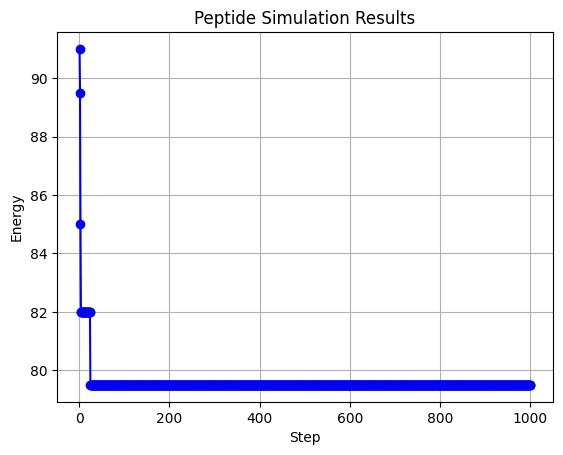

In [10]:
import csv
import matplotlib.pyplot as plt

# Read the simulation results from the CSV file
steps = []
energies = []

with open("simulation_results.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    for row in reader:
        step, energy = int(row[0]), float(row[1])
        steps.append(step)
        energies.append(energy)

# Generate the graph
plt.plot(steps, energies, '-o', color='blue')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()


In [4]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Simulate the peptide conformation
def simulate_peptide(peptide_structure):
    # Extract phi angles from the peptide structure
    phi_angles = []
    for residue in peptide_structure.get_residues():
        if residue.get_id()[0] == ' ':
            try:
                phi_angle = residue['N'].get_vector().get_angle(residue['CA'].get_vector(), residue['C'].get_vector())
                phi_angles.append(np.degrees(phi_angle))
            except KeyError:
                phi_angles.append(None)
        else:
            phi_angles.append(None)

    # Generate initial random conformation
    conformation = phi_angles

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(phi_angles) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Read the PDB file
pdb_parser = PDBParser()
peptide_structure = pdb_parser.get_structure("peptide", "1l2y.pdb")

# Run the simulation
best_conformation, energies = simulate_peptide(peptide_structure)

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Step", "Energy"])
    for i, energy in enumerate(energies):
        writer.writerow([i+1, energy])

# Generate the graph
steps = list(range(1, num_steps+1))

plt.plot(steps, energies, '-o', color='blue')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()


AttributeError: 'Vector' object has no attribute 'get_angle'

In [5]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Selection

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Simulate the peptide conformation
def simulate_peptide(peptide_structure):
    # Extract phi angles from the peptide structure
    phi_angles = []
    for residue in Selection.unfold_entities(peptide_structure, "R"):
        try:
            phi_angle = residue['N'].get_vector().calc_angle(residue['CA'].get_vector(), residue['C'].get_vector())
            phi_angles.append(np.degrees(phi_angle))
        except KeyError:
            phi_angles.append(None)

    # Generate initial random conformation
    conformation = phi_angles

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(phi_angles) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Read the PDB file
pdb_parser = PDBParser()
peptide_structure = pdb_parser.get_structure("peptide", "1l2y.pdb")

# Run the simulation
best_conformation, energies = simulate_peptide(peptide_structure)

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Step", "Energy"])
    for i, energy in enumerate(energies):
        writer.writerow([i+1, energy])

# Generate the graph
steps = list(range(1, num_steps+1))

plt.plot(steps, energies, '-o', color='blue')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()


AttributeError: 'Vector' object has no attribute 'calc_angle'

In [6]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Polypeptide

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Simulate the peptide conformation
def simulate_peptide(peptide_structure):
    # Extract phi angles from the peptide structure
    phi_angles = Polypeptide.CaPS(peptide_structure)

    # Generate initial random conformation
    conformation = phi_angles

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(phi_angles) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Read the PDB file
pdb_parser = PDBParser()
peptide_structure = pdb_parser.get_structure("peptide", "1l2y.pdb")

# Run the simulation
best_conformation, energies = simulate_peptide(peptide_structure)

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Step", "Energy"])
    for i, energy in enumerate(energies):
        writer.writerow([i+1, energy])

# Generate the graph
steps = list(range(1, num_steps+1))

plt.plot(steps, energies, '-o', color='blue')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()


AttributeError: module 'Bio.PDB.Polypeptide' has no attribute 'CaPS'

In [7]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Calculate the phi angles from the peptide structure
def calculate_phi_angles(peptide_structure):
    phi_angles = []

    for model in peptide_structure:
        for chain in model:
            residues = chain.get_residues()
            prev_residue = None

            for residue in residues:
                if prev_residue is not None:
                    try:
                        phi_angle = prev_residue['C'].get_vector().get_angle(residue['N'].get_vector(), residue['CA'].get_vector())
                        phi_angles.append(np.degrees(phi_angle))
                    except KeyError:
                        phi_angles.append(None)
                prev_residue = residue

    return phi_angles

# Simulate the peptide conformation
def simulate_peptide(phi_angles):
    # Generate initial random conformation
    conformation = phi_angles

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(phi_angles) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Read the PDB file
pdb_parser = PDBParser()
peptide_structure = pdb_parser.get_structure("peptide", "1l2y.pdb")

# Calculate the phi angles from the peptide structure
phi_angles = calculate_phi_angles(peptide_structure)

# Run the simulation
best_conformation, energies = simulate_peptide(phi_angles)

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Step", "Energy"])
    for i, energy in enumerate(energies):
        writer.writerow([i+1, energy])

# Generate the graph
steps = list(range(1, num_steps+1))

plt.plot(steps, energies, '-o', color='blue')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()


AttributeError: 'Vector' object has no attribute 'get_angle'

In [8]:
import random
import csv
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Selection

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Calculate the phi angles from the peptide structure
def calculate_phi_angles(peptide_structure):
    phi_angles = []

    for residue in Selection.unfold_entities(peptide_structure, "R"):
        try:
            phi_atoms = residue.get_atoms()
            ca = next(phi_atoms)
            c = next(phi_atoms)
            n_next = next(phi_atoms)
            n = next(phi_atoms)
            phi_angle = ca.get_angle(c, n_next)
            phi_angles.append(np.degrees(phi_angle))
        except StopIteration:
            phi_angles.append(None)

    return phi_angles

# Simulate the peptide conformation
def simulate_peptide(phi_angles):
    # Generate initial random conformation
    conformation = phi_angles

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(phi_angles) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Read the PDB file
pdb_parser = PDBParser()
peptide_structure = pdb_parser.get_structure("peptide", "1l2y.pdb")

# Calculate the phi angles from the peptide structure
phi_angles = calculate_phi_angles(peptide_structure)

# Run the simulation
best_conformation, energies = simulate_peptide(phi_angles)

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Step", "Energy"])
    for i, energy in enumerate(energies):
        writer.writerow([i+1, energy])

# Generate the graph
steps = list(range(1, num_steps+1))

plt.plot(steps, energies, '-o', color='blue')
plt.xlabel("Step")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()


AttributeError: 'Atom' object has no attribute 'get_angle'

In [11]:
import random
import csv

# Define the amino acid sequence of the peptide
peptide_sequence = "ACDEFGHIKLMNPQRSTVWY"

# Define the simulation parameters
temperature = 300  # Temperature in Kelvin
num_steps = 1000  # Number of simulation steps
time_step = 1e-12  # Time step in seconds
picoseconds = num_steps * time_step * 1e12  # Total simulation time in picoseconds

# Calculate the energy of the peptide conformation
def calculate_energy(conformation):
    # Define energy parameters (example values)
    contact_energy = -1
    torsional_energy = -0.5

    # Calculate contact energy as the number of neighboring residues
    contact_energy_term = sum(1 for i in range(len(conformation) - 1) if abs(conformation[i] - conformation[i+1]) == 1)

    # Calculate torsional energy as the sum of dihedral angles
    torsional_energy_term = sum(conformation)

    # Calculate total energy as the sum of contact and torsional energies
    total_energy = contact_energy * contact_energy_term + torsional_energy * torsional_energy_term
    return total_energy

# Simulate the peptide conformation
def simulate_peptide():
    # Generate initial random conformation
    conformation = [random.randint(-180, 180) for _ in range(len(peptide_sequence))]

    # Initialize best conformation and energy
    best_conformation = conformation
    best_energy = calculate_energy(conformation)

    # Perform simulation steps
    energies = []
    for _ in range(num_steps):
        # Randomly select an index to perturb
        index = random.randint(0, len(peptide_sequence) - 1)

        # Generate a random perturbation angle
        perturbation = random.randint(-10, 10)

        # Update the conformation with the perturbation
        conformation[index] += perturbation

        # Calculate the new energy of the conformation
        new_energy = calculate_energy(conformation)

        # Accept or reject the new conformation based on energy difference
        if new_energy < best_energy:
            # Update the best conformation and energy
            best_conformation = conformation
            best_energy = new_energy

        # Store the energy at each step
        energies.append(best_energy)

    return best_conformation, energies

# Run the simulation
best_conformation, energies = simulate_peptide()

# Save the results to a CSV file
with open("simulation_results.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Time (ps)", "Energy"])
    for i, energy in enumerate(energies):
        time = (i + 1) * time_step * 1e12  # Calculate time in picoseconds
        writer.writerow([time, energy])

# Print the results
print("Best conformation:", best_conformation)
print("Total simulation time:", picoseconds, "ps")
print("Saved results to simulation_results.csv file.")


Best conformation: [-10, 141, 100, -105, 149, 21, -146, -58, 0, -206, -135, -69, 68, 133, 146, -165, 195, -118, 165, 87]
Total simulation time: 1000.0000000000001 ps
Saved results to simulation_results.csv file.


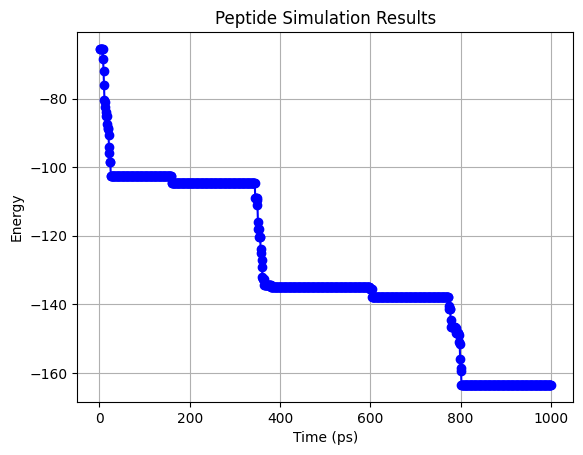

In [13]:
import matplotlib.pyplot as plt

# Read the results from the CSV file
times = []
energies = []
with open("simulation_results.csv", "r") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    for row in reader:
        time = float(row[0])
        energy = float(row[1])
        times.append(time)
        energies.append(energy)

# Plot the energy graph
plt.plot(times, energies, '-o', color='blue')
plt.xlabel("Time (ps)")
plt.ylabel("Energy")
plt.title("Peptide Simulation Results")
plt.grid(True)

# Save the graph as an image file
plt.savefig("simulation_graph.png")

# Show the graph
plt.show()
